In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
import math
wn=w2n.word_to_num
print(wn('6'))

6


<Axes: >

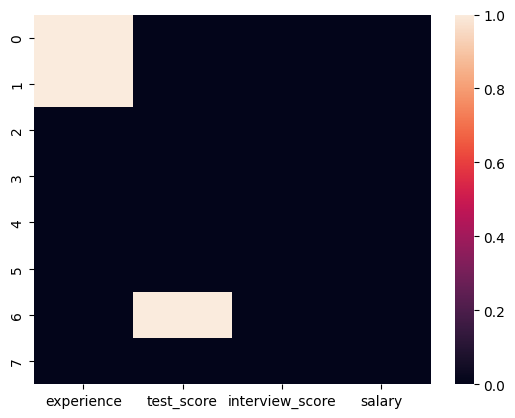

In [12]:
df=pd.read_csv("O:/PYTHON/investinng python/ml/salary-prediction.csv")
df
import seaborn as sns
sns.heatmap(df.isnull())

In [13]:
df.experience=df.experience.fillna(0)
df


,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
med_testscore=math.floor(df.test_score.median())
med_testscore


8

In [15]:
df.test_score=df.test_score.fillna(med_testscore)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [7]:
#print(wn('eight'))      if i==int:
'''
for i in range (0,8):
    print(wn(str(df.experience[i])))'''

df["experience"] = df["experience"].apply(lambda x: wn(str(x)))

# for i in range (0,len(df)):
#     # print(wn(str(df.experience[i])))
#     df.experience[i]=wn(str(df.experience[i]))
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df.salary)

LinearRegression()

In [9]:
m1,m2,m3=reg.coef_
print(m1,m2,m3,'\n')
b=reg.intercept_
price_salary=m1*df.experience+m2*df.test_score+m3*df.interview_score+b
price_salary


2812.9548762736536 1845.7059679767108 2205.24017467249 



0    52350.072780
1    45734.352256
2    58312.954876
3    63872.634643
4    67270.742358
5    61148.471616
6    76069.141194
7    79241.630277
dtype: float64

In [115]:
reg.predict([[0,8,9]])

C:\Users\subu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52350.0727802])

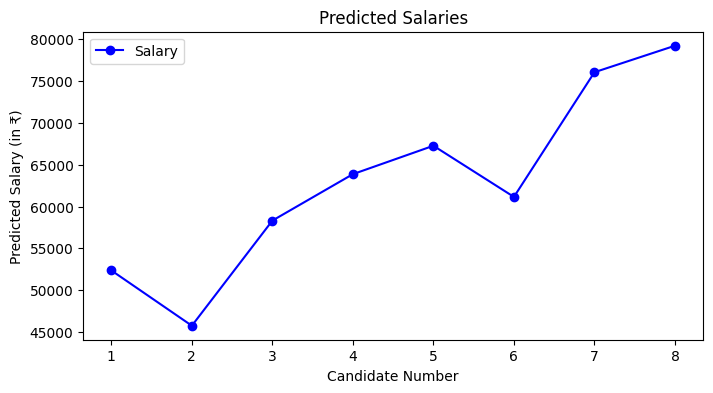

In [119]:
# for i in range(1,len(df)+1)
# plt.plot(range(1,len(df)+1),price_salary,color='b')


plt.figure(figsize=(8, 4))
plt.plot(range(1,len(df)+1),price_salary,color='b', marker='o', linestyle='-', label='Salary')
plt.xlabel("Candidate Number"); plt.ylabel("Predicted Salary (in ₹)"); plt.title("Predicted Salaries");
plt.legend()

# plt.grid(True)
